In [2]:
import pandas as pd,yfinance as yf, matplotlib.pyplot as plt

In [3]:
#df=pd.read_csv('AAPL.csv')

df = yf.download(tickers='AAPL',start='2015-5-27',end='2020-5-22')

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-05-27,29.643909,33.009998,33.064999,32.512501,32.584999,183332800
2015-05-28,29.585545,32.945000,32.987499,32.775002,32.965000,122933200
2015-05-29,29.248785,32.570000,32.862499,32.474998,32.807499,203538000
2015-06-01,29.307154,32.634998,32.847500,32.512501,32.570000,128451200
2015-06-02,29.176950,32.490002,32.665001,32.330002,32.465000,134670400


In [5]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-05-15,74.959236,76.927498,76.974998,75.052498,75.087502,166348400
2020-05-18,76.725349,78.739998,79.125000,77.580002,78.292503,135178400
2020-05-19,76.281998,78.285004,79.629997,78.252502,78.757500,101729600
2020-05-20,77.765564,79.807503,79.879997,79.129997,79.169998,111504800
2020-05-21,77.185783,79.212502,80.222504,78.967499,79.665001,102688800


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1

Ticker,AAPL
0,33.009998
1,32.945000
2,32.570000
3,32.634998
4,32.490002
...,...
1252,76.927498
1253,78.739998
1254,78.285004
1255,79.807503


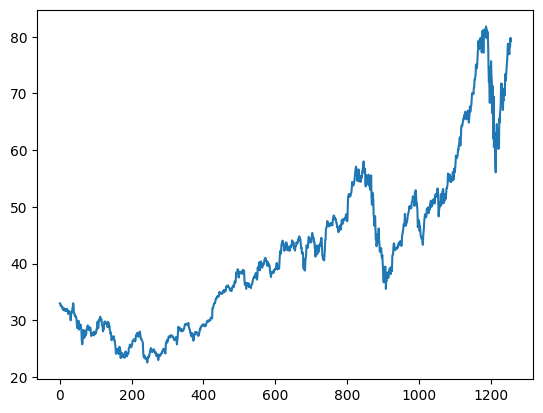

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
import numpy as np

In [10]:
df1

Ticker,AAPL
0,33.009998
1,32.945000
2,32.570000
3,32.634998
4,32.490002
...,...
1252,76.927498
1253,78.739998
1254,78.285004
1255,79.807503


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.17605334]
 [0.17495567]
 [0.16862281]
 ...
 [0.94064005]
 [0.96635143]
 [0.95630328]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(817, 440)

In [15]:
train_data

array([[0.17605334],
       [0.17495567],
       [0.16862281],
       [0.16972049],
       [0.16727184],
       [0.16794729],
       [0.16473867],
       [0.16174109],
       [0.15815251],
       [0.15654817],
       [0.16271218],
       [0.16148779],
       [0.15549269],
       [0.15443722],
       [0.15730811],
       [0.15604156],
       [0.15849024],
       [0.15308621],
       [0.15735034],
       [0.15490163],
       [0.15946129],
       [0.15688593],
       [0.1537195 ],
       [0.14434687],
       [0.14814659],
       [0.15308621],
       [0.15241072],
       [0.15055307],
       [0.1492443 ],
       [0.13607195],
       [0.12551719],
       [0.13906949],
       [0.14911764],
       [0.14890654],
       [0.15401503],
       [0.16115003],
       [0.16583634],
       [0.17618006],
       [0.17060711],
       [0.14726   ],
       [0.14700669],
       [0.14422022],
       [0.13691631],
       [0.13949168],
       [0.13784514],
       [0.13522758],
       [0.13071014],
       [0.118

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 488ms/step - loss: 0.0367 - val_loss: 0.0663
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - loss: 0.0019 - val_loss: 0.0040
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - loss: 0.0010 - val_loss: 0.0081
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - loss: 7.1698e-04 - val_loss: 0.0066
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - loss: 6.1779e-04 - val_loss: 0.0046
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 6.4720e-04 - val_loss: 0.0044
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 5.6991e-04 - val_loss: 0.0042
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 5.6109e-04 - val_loss: 0.0044
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 6.0591e-04 - val_loss: 0.0041
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 6.0751e-04 - val_loss: 0.0040
Epoch 12/100

In [25]:
import tensorflow as tf

In [26]:
tf.__version__

'2.17.0'

In [27]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [28]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

35.60754422394417

In [30]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

59.17389730109288

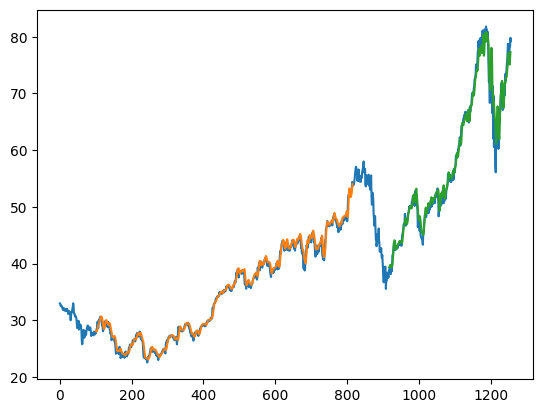

In [31]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [32]:
len(test_data)

440

In [33]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input

[0.8493624047839645,
 0.8583550786846084,
 0.8866418799940063,
 0.8743138666861476,
 0.8843197560655391,
 0.8783669862856442,
 0.8986320689141138,
 0.9258211342267,
 0.9287763889871312,
 0.9567676261678102,
 0.9386978866907114,
 0.9330405521972824,
 0.9495059479381955,
 0.9642404768503328,
 0.9551211510148454,
 0.9598919219643705,
 0.9663514283258923,
 0.9624672209202714,
 0.9229502711420798,
 0.9598496617053383,
 0.9879252905618283,
 0.9859409910211123,
 0.9253145264873261,
 0.9217258832104245,
 0.9647470845897066,
 0.9757240580310664,
 0.9915983255145413,
 0.969728899149886,
 0.9761461452523756,
 0.9679556432198246,
 1.0000000000000002,
 0.9901628939722313,
 0.9905007183599825,
 0.9653803442639237,
 0.9848855152833327,
 0.970868766563477,
 0.9402599701678649,
 0.877480293899487,
 0.8348390483247352,
 0.8541331757334893,
 0.7733681516638238,
 0.7726926317305745,
 0.8801401133734523,
 0.8400742955968548,
 0.8967321610492089,
 0.8552731719893336,
 0.8388499076651994,
 0.7423372680469023

In [36]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.94740385]
101
1 day input [0.85835508 0.88664188 0.87431387 0.88431976 0.87836699 0.89863207
 0.92582113 0.92877639 0.95676763 0.93869789 0.93304055 0.94950595
 0.96424048 0.95512115 0.95989192 0.96635143 0.96246722 0.92295027
 0.95984966 0.98792529 0.98594099 0.92531453 0.92172588 0.96474708
 0.97572406 0.99159833 0.9697289  0.97614615 0.96795564 1.
 0.99016289 0.99050072 0.96538034 0.98488552 0.97086877 0.94025997
 0.87748029 0.83483905 0.85413318 0.77336815 0.77269263 0.88014011
 0.8400743  0.89673216 0.85527317 0.83884991 0.74233727 0.82327108
 0.781432   0.66659625 0.79215567 0.64118044 0.68614369 0.6600101
 0.6520307  0.58642236 0.56586165 0.66089672 0.65515493 0.70970191
 0.66452756 0.69437638 0.69218098 0.63569196 0.65266396 0.63780291
 0.72671618 0.71388155 0.74191505 0.75002103 0.77222828 0.83049049
 0.81942913 0.82897067 0.81254741 0.78776486 0.75162538 0.78426073
 0.77974327 0.81326519 0.81410962 0.79473097 0.83336149 0.85898834
 0.83901882 0.85628639 0.87486273 0.887824

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

*Ploting Forecasting*

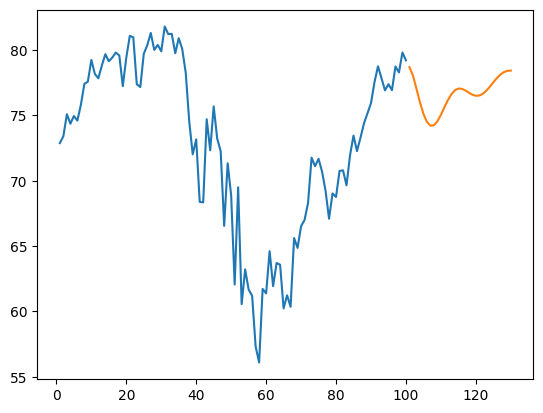

In [38]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

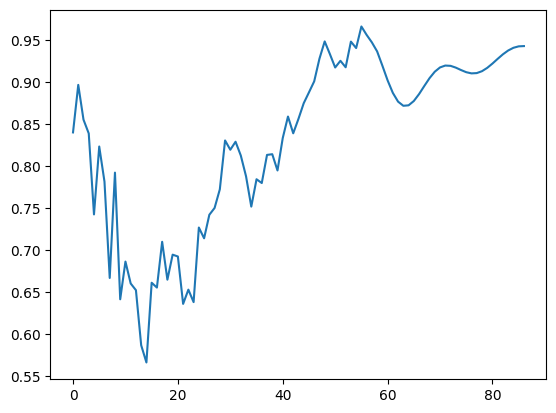

In [39]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

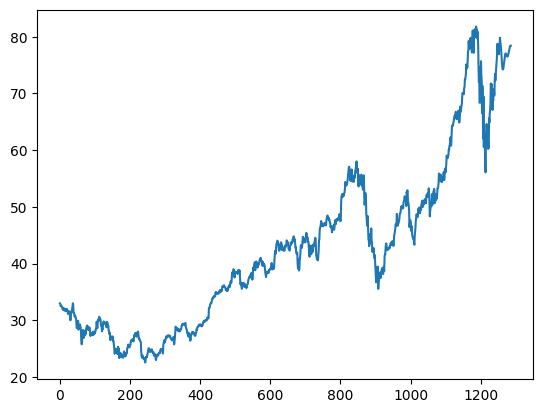

In [40]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [43]:
lst_output

[[0.9474038481712341],
 [0.9366531372070312],
 [0.9196892380714417],
 [0.9021326303482056],
 [0.8871618509292603],
 [0.8767354488372803],
 [0.8718186020851135],
 [0.872374951839447],
 [0.8775141835212708],
 [0.8857722282409668],
 [0.8954252004623413],
 [0.9047838449478149],
 [0.9124559760093689],
 [0.9175483584403992],
 [0.919776201248169],
 [0.9194446206092834],
 [0.9173218607902527],
 [0.9144366383552551],
 [0.9118490219116211],
 [0.910446286201477],
 [0.9107905626296997],
 [0.9130513072013855],
 [0.9170154333114624],
 [0.9221673607826233],
 [0.9278120398521423],
 [0.933216392993927],
 [0.9377412796020508],
 [0.9409493803977966],
 [0.9426649808883667],
 [0.9429819583892822]]

In [57]:
pred = pd.DataFrame(scaler.inverse_transform(lst_output))
pred.columns = ['Close']
pred

,Close
0,78.685522
1,78.048918
2,77.044401
3,76.004786
4,75.118292
5,74.500892
6,74.209741
7,74.242685
8,74.547005
9,75.036005


In [60]:

# Assuming you want a date range for the next 30 days
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')  # 'B' for business days

# Assign the forecast index to pred
pred.index = forecast_index
pred = pred.rename_axis('Date')

# Check the result
print(pred)


                Close
Date                 
2020-05-22  78.685522
2020-05-25  78.048918
2020-05-26  77.044401
2020-05-27  76.004786
2020-05-28  75.118292
2020-05-29  74.500892
2020-06-01  74.209741
2020-06-02  74.242685
2020-06-03  74.547005
2020-06-04  75.036005
2020-06-05  75.607606
2020-06-08  76.161778
2020-06-09  76.616083
2020-06-10  76.917629
2020-06-11  77.049550
2020-06-12  77.029916
2020-06-15  76.904217
2020-06-16  76.733368
2020-06-17  76.580143
2020-06-18  76.497080
2020-06-19  76.517466
2020-06-22  76.651336
2020-06-23  76.886072
2020-06-24  77.191143
2020-06-25  77.525393
2020-06-26  77.845411
2020-06-29  78.113353
2020-06-30  78.303320
2020-07-01  78.404910
2020-07-02  78.423679


In [64]:
pred.tail()

,Close
Date,
2020-06-26,77.845411
2020-06-29,78.113353
2020-06-30,78.303320
2020-07-01,78.404910
2020-07-02,78.423679


In [66]:
actual_df = yf.download(tickers='AAPL',start='2020-5-22',end='2020-7-2')
actual_df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-05-22,77.682724,79.722504,79.807503,78.837502,78.942497,81803200
2020-05-26,77.156532,79.182503,81.059998,79.125000,80.875000,125522000
2020-05-27,77.492706,79.527496,79.677498,78.272499,79.035004,112945200
2020-05-28,77.526817,79.562500,80.860001,78.907501,79.192497,133560800
2020-05-29,77.451286,79.485001,80.287498,79.117500,79.812500,153532400
2020-06-01,78.403770,80.462502,80.587502,79.302498,79.437500,80791200
2020-06-02,78.766762,80.834999,80.860001,79.732498,80.187500,87642800
2020-06-03,79.200363,81.279999,81.550003,80.574997,81.165001,104491200


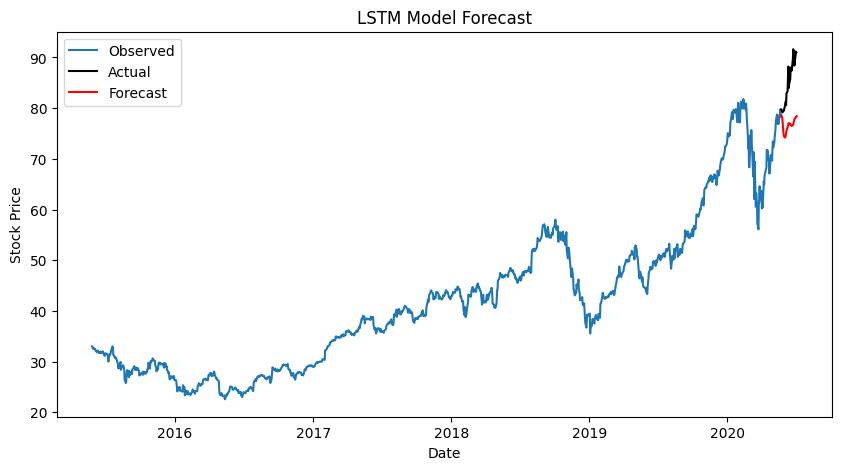

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed')

#plt.plot(scaler.inverse_transform(lst_output), label='Forecast', color='red')
plt.plot(actual_df['Close'],label='Actual',color='Black')

plt.plot(pred['Close'],label='Forecast', color='red')
plt.title('LSTM Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()